In [1]:
import numpy as np

# fake_data_file.npy
file_path = '/home/rzhou/Projects/Diffusion-TS/OUTPUT/rounD_map02-08_interval100_seq500_reduced_nfea30/samples/rounD_map02-08_interval100_seq500_reduced_nfea30_norm_truth_500_train.npy'

# 使用numpy的load函数读取npy文件
fake_data_norm = np.load(file_path)

# 现在，变量data包含了npy文件中的数据
# 你可以打印数据来查看内容，或者进行其他操作
print(fake_data_norm[0])

[[0.4584373  0.60505059 0.56763543 ... 1.         0.         1.        ]
 [0.45633596 0.60406581 0.56530048 ... 1.         0.         1.        ]
 [0.45422412 0.60310141 0.56296693 ... 1.         0.         1.        ]
 ...
 [0.         1.         0.         ... 1.         0.         1.        ]
 [0.         1.         0.         ... 1.         0.         1.        ]
 [0.         1.         0.         ... 1.         0.         1.        ]]


In [10]:
import numpy as np

# Assuming the CSV file contains numerical data that can be directly loaded into a numpy array
file_path = '/DATA1/rzhou/ika/multi_testcases/inD/reduced/seq500/inD_map15_interval10_seq500_nfea10.csv'
# Assuming seq_length is 1000 and nfea is 100 (excluding the caseID column)
seq_length = 500
nfea = 10

ori_data = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=range(1,nfea+1))  # Skipping the header and the first column

# Reshaping the data into (n, seq, nfea) structure
n = ori_data.shape[0] // seq_length
reshaped_data = ori_data.reshape(n, seq_length, nfea)

reshaped_data.shape  # To see the shape of the reshaped numpy array


(564, 500, 10)

In [11]:
# 已经有了reshaped_data，现在计算排除0值后的x和y坐标的取值范围
x_values = reshaped_data[:, :, 0::2]  # 取出所有x坐标
y_values = reshaped_data[:, :, 1::2]  # 取出所有y坐标

# 排除0值
x_values_nonzero = x_values[x_values != 0]
y_values_nonzero = y_values[y_values != 0]

# 计算取值范围
x_min, x_max = x_values_nonzero.min(), x_values_nonzero.max()
y_min, y_max = y_values_nonzero.min(), y_values_nonzero.max()

x_min, x_max, y_min, y_max


(26.13397, 80.83223, -62.26239, -1.09165)

width:1170,height:780


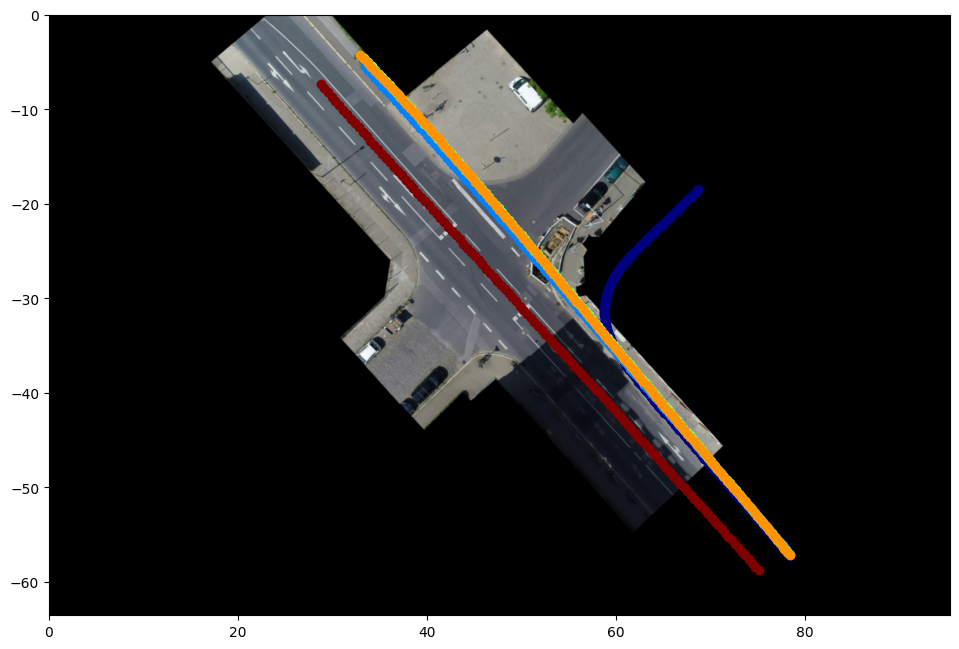

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# choose a random index from reshaped_data first dimension
random_index = random.randint(0, reshaped_data.shape[0] - 1)
data = reshaped_data[random_index]  # 取第一个元素，其形状应该是 (1000, 112)
Dtype="inD"
index_map=15
# 载入背景图片
bg_image_path = f'/DATA1/rzhou/ika/{Dtype}/data/{index_map:02d}_background.png'
bg_img = Image.open(bg_image_path)
# 获取图像的宽度和高度
width, height = bg_img.size
print(f"width:{width},height:{height}")

# 读取CSV文件
df_recordingMeta = pd.read_csv(f"/DATA1/rzhou/ika/{Dtype}/data/{index_map:02d}_recordingMeta.csv")
# 读取最后一列"orthoPxToMeter"的值
ortho_px_to_meter = df_recordingMeta["orthoPxToMeter"].iloc[0]

# 将图像的尺寸转换为英寸（matplotlib的figsize是以英寸为单位的）
# 假设希望每100像素对应于1英寸，则可以按如下方式计算figsize：
figsize = (width / 100, height / 100)

# 创建图形和轴，使用图像的原始尺寸
fig, ax = plt.subplots(figsize=figsize)

ax.set_xlim(0, width*ortho_px_to_meter*10)
ax.set_ylim(-height*ortho_px_to_meter*10, 0)

# 加载并显示背景图
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, width*ortho_px_to_meter*10, -height*ortho_px_to_meter*10, 0])

num_tracks=reshaped_data.shape[2]//2
colors = plt.cm.jet(np.linspace(0, 1, num_tracks))  # 生成颜色

for i in range(num_tracks):
    # 提取每个轨迹的x和y坐标
    x = data[:, i * 2]  # 偶数列为x坐标
    y = data[:, i * 2 + 1]  # 奇数列为y坐标
    
    # 过滤出非零点
    nonzero_indices = (x != 0) & (y != 0)
    x_filtered = x[nonzero_indices]
    y_filtered = y[nonzero_indices]

    # 绘制轨迹
    ax.plot(x_filtered, y_filtered, marker='o', linestyle='-', color=colors[i])  # 移除了label参数，以避免图例过于拥挤

plt.show()


555


/tmp/ipykernel_453273/1881559705.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


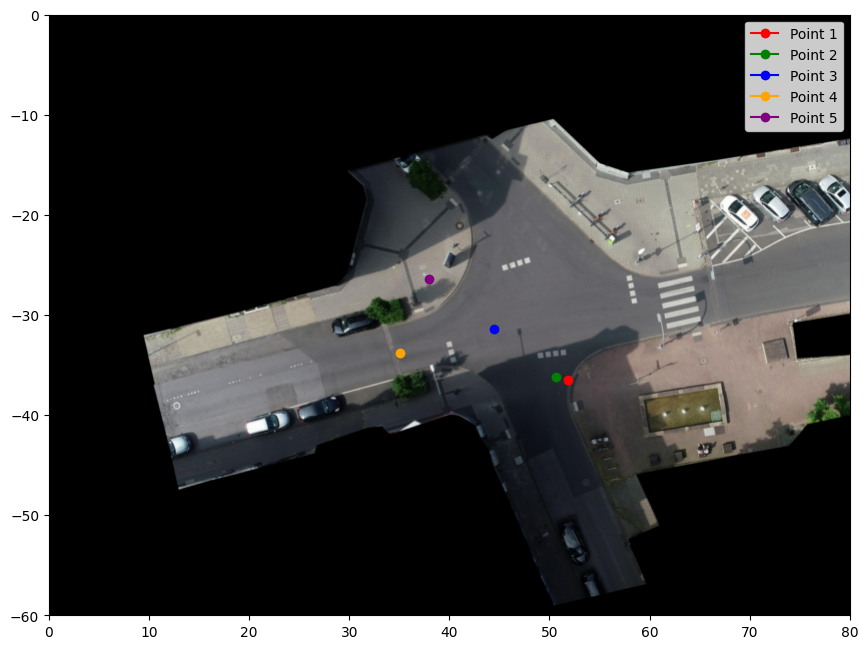

In [22]:
#动画 5个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random

# 假设 fake_data 是一个形状为 (2001, 100, 10) 的数组
# 这里你需要加载你的真实数据
# fake_data = ...

# 随机选择一个元素而不是固定的 330
random_index = random.randint(0, fake_data.shape[0] - 1)
#random_index=111
print(random_index)

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
fig, ax = plt.subplots(figsize=(11.7, 7.8))
ax.set_xlim(0, 80)
ax.set_ylim(-60, 0)
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, 117, -78, 0])

colors = ['red', 'green', 'blue', 'orange', 'purple']
lines = [ax.plot([], [], marker='o', linestyle='-', color=colors[i], label=f'Point {i+1}')[0] for i in range(5)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j, line in enumerate(lines):
        x = fake_data[random_index][i, j*2]
        y = fake_data[random_index][i, j*2+1]
        line.set_data(x, y)
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=250, interval=40, blit=True)

plt.legend()

# 保存动画为MP4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_multi_18-29_interval250/samples/19map/{random_index}.mp4', writer=writer)


Random index: 78


/tmp/ipykernel_514955/121912310.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


KeyboardInterrupt: 

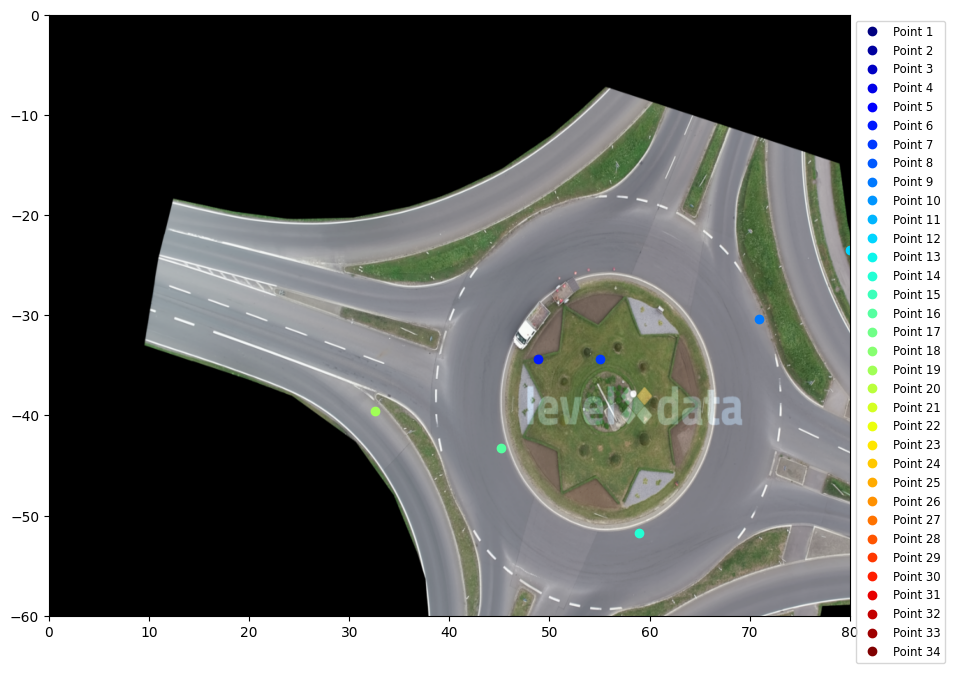

In [5]:
#动画, 多个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random

# 假设 reshaped_data 是一个形状为 (num_cases, 1500, 60) 的数组
# 生成1个case
random_index = random.randint(0, reshaped_data.shape[0] - 1)
#random_index = 111
print(f"Random index: {random_index}")

# 生成多个case
# num_cases=5
# random_indices = np.random.choice(reshaped_data.shape[0], num_cases, replace=False)
# print(f"Random indices: {random_indices}")

num_v=34

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/rounD/data/02_background.png'
bg_img = plt.imread(bg_image_path)

#设置num_v个颜色
colors = plt.cm.jet(np.linspace(0, 1, num_v))

#for random_index in random_indices:
fig, ax = plt.subplots(figsize=(11.7, 7.8))
ax.set_xlim(0, 80)
ax.set_ylim(-60, 0)
ax.imshow(bg_img, extent=[0, 117, -78, 0])

lines = [ax.plot([], [], marker='o', linestyle='', color=colors[i])[0] for i in range(num_v)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j, line in enumerate(lines):
        x = reshaped_data[random_index][i, j*2]
        y = reshaped_data[random_index][i, j*2+1]
        # 如果x或y为0，则不显示该点
        if x == 0 and y == 0:
            line.set_data([], [])
        else:
            line.set_data(x, y)
        print(j)
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=40, blit=True)

#plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper right', fontsize='small')
# 在每个动画循环的末尾，但在保存动画之前，添加图例
plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


# 保存动画为MP4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save(f'/home/rzhou/Projects/Diffusion-TS/Visialization/rounD_02_{random_index}.mp4', writer=writer)
plt.close(fig)  # 关闭当前绘图窗口，防止过多图形打开